In [1]:

%run ../../load_magic/storage.py
%run ../../load_magic/dataframes.py
%pprint
%who

DATA_FOLDER: ../data/
SAVES_FOLDER: ../saves/
Pretty printing has been turned OFF
DATA_FOLDER	 ENCODING_TYPE	 SAVES_FOLDER	 attempt_to_pickle	 example_iterrows	 get_column_descriptions	 load_csv	 load_dataframes	 load_object	 
math	 os	 pd	 pickle	 save_dataframes	 store_objects	 


In [3]:

# From https://journals.sagepub.com/doi/abs/10.1177/0956797617741719
# https://journals.sagepub.com/doi/pdf/10.1177/0956797617741719
gggi_stem_df = load_csv('gggi_stem')

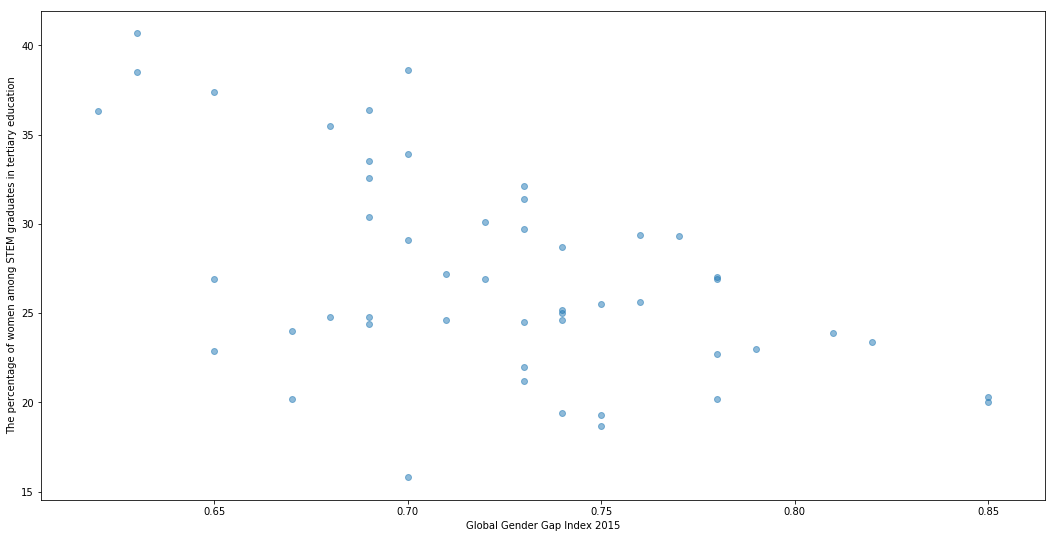

In [4]:

%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 9))

xname = 'Global Gender Gap Index 2015'
xdata = gggi_stem_df[xname]
xlabel_text = plt.xlabel(xname)

yname = 'The percentage of women among STEM graduates in tertiary education'
ydata = gggi_stem_df[yname]
ylabel_text = plt.ylabel(yname)

path_collection = plt.scatter(xdata, ydata, alpha=0.5)

In [5]:

file_name = r'../data/html/UNODC_murder_rates.html'
unodc_df = pd.read_html(file_name)[0]
unodc_df.columns = ['Country', 'Murder_rate', 'Murder_count', 'Region', 'Subregion', 'Year_listed',
                    'UNODC_notes']
unodc_df.sample(10).T

,32,35,77,65,129,80,196,201,3,4
Country,Morocco,Botswana,Turks and Caicos Islands (UK),Dominican Republic,Afghanistan,Costa Rica,Luxembourg,New Zealand,Eritrea,Ethiopia
Murder_rate,1.05,10.53,6.61,17.39,6.55,11.77,0.72,0.91,7.46,7.6
Murder_count,355,220,2,1810,1948,566,4,41,390,7552
Region,Africa,Africa,Americas,Americas,Asia,Americas,Europe,Oceania,Africa,Africa
Subregion,Northern Africa,Southern Africa,Caribbean,Caribbean,Southern Asia,Central America,Western Europe,Australasia,Eastern Africa,Eastern Africa
Year_listed,2014,2011,2009,2014,2012,2015,2014,2014,2015,2015
UNODC_notes,NaN,NaN,NaN,NaN,notes,NaN,NaN,NaN,NaN,NaN


In [7]:

gggi_stem_df.columns = ['Country', 'GGGI_2015', 'Percent_STEM_Women']
merge_df = pd.merge(left=gggi_stem_df, right=unodc_df, how='inner', on=['Country'],
                    suffixes=('_gggi_stem', '_unodc'))
merge_df.sample(10).T

,24,2,35,34,18,44,46,12,15,32
Country,Luxembourg,Australia,Romania,Qatar,Greece,United Kingdom,Vietnam,Denmark,France,Poland
GGGI_2015,0.74,0.73,0.69,0.65,0.69,0.76,0.69,0.77,0.76,0.72
Percent_STEM_Women,28.7,24.5,32.6,22.9,30.4,29.4,36.4,29.3,25.6,26.9
Murder_rate,0.72,0.98,1.49,8.1,0.85,0.92,1.52,0.99,1.58,0.74
Murder_count,4,236,291,181,93,594,1358,56,1017,286
Region,Europe,Oceania,Europe,Asia,Europe,Europe,Asia,Europe,Europe,Europe
Subregion,Western Europe,Australasia,Eastern Europe,Western Asia,Southern Europe,Northern Europe,South-Eastern Asia,Northern Europe,Western Europe,Eastern Europe
Year_listed,2014,2015,2015,2015,2015,2014,2011,2015,2015,2015
UNODC_notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:

merge_df['Region'].unique()

array(['Europe', 'Africa', 'Oceania', 'Americas', 'Asia'], dtype=object)

In [28]:

def get_color(region):
    region_color = 'w'
    if region in ['Europe']:
        
        # Blue
        region_color = 'b'
        
    elif region == 'Africa':
        
        # Black
        region_color = 'k'
        
    elif region == 'Oceania':
        
        # Cyan
        region_color = 'c'
        
    elif region == 'Americas':
        
        # Green
        region_color = 'g'
        
    elif region == 'Asia':
        
        # Red
        region_color = 'r'
    
    return region_color

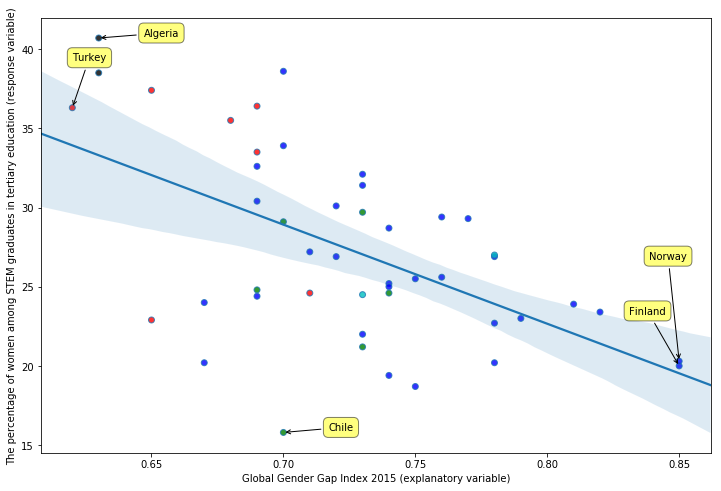

In [29]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
scatter_kws = dict(facecolors=merge_df['Region'].map(get_color))
xname = 'GGGI_2015'
yname = 'Percent_STEM_Women'
merge_axes_subplot = sns.regplot(x=xname, y=yname, scatter=True, data=merge_df,
                                 scatter_kws=scatter_kws)
xlabel_text = plt.xlabel('Global Gender Gap Index 2015 (explanatory variable)')
ylabel_str = 'The percentage of women among STEM graduates in tertiary education (response variable)'
ylabel_text = plt.ylabel(ylabel_str)
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
smallest_gap = merge_df[xname].min()
biggest_gap = merge_df[xname].max()
most_in_stem = merge_df[yname].max()
least_in_stem = merge_df[yname].min()
n = 0
for label, x, y in zip(merge_df['Country'], merge_df[xname], merge_df[yname]):
    if (x == smallest_gap):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 45), **kwargs)
    if (x == biggest_gap):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-50+20*n, 50+50*n), **kwargs)
        n += 1
    if (y == most_in_stem):
        annotation = plt.annotate(label, xy=(x, y), xytext=(45, 0), **kwargs)
    if (y == least_in_stem):
        annotation = plt.annotate(label, xy=(x, y), xytext=(45, 0), **kwargs)

In [ ]:

wiki_url = 'https://en.wikipedia.org/wiki/'
tables_url = '{}Global_Gender_Gap_Report'.format(wiki_url)
tables_df_list = pd.read_html(tables_url)
gggi_df = tables_df_list[0]

In [ ]:

import re

gggi_df.columns = list(gggi_df.iloc[0].values[:2]) + [int(re.split('[\.\[]', str(year))[0])
                                                      for year in list(gggi_df.iloc[1].values[:-2])]

In [ ]:

rate_by_state_df = tables_df_list[0].dropna(axis=0, how='all').dropna(axis=1, how='all')
rate_by_state_df.columns = rate_by_state_df.iloc[0]
rate_by_state_df = rate_by_state_df.iloc[1:].T
rate_by_state_df.columns = rate_by_state_df.iloc[0]
rate_by_state_df = rate_by_state_df.iloc[1:].T
rate_by_state_df.columns = rate_by_state_df.columns.map(lambda x: int(x))
rate_by_state_df.head(5).T.head(5).T

In [ ]:

wiki_url = 'https://en.wikipedia.org/wiki/'
us_pop_df = pd.DataFrame([])
year = 1980
try:
    tables_url = '{}{}_United_States_Census'.format(wiki_url, year)
    tables_df_list = pd.read_html(tables_url)

    pop_df = tables_df_list[1].dropna(axis=0, how='all').dropna(axis=1, how='all')
    pop_df.columns = pop_df.iloc[0]
    
    pop_df = pop_df.iloc[1:].T
    pop_df.columns = pop_df.iloc[1]
    
    column_list = [0, 2]
    pop_df = pop_df.iloc[column_list].T
    pop_df.columns = ['Rank_{}'.format(year), 'Population_{}'.format(year)]
    
    us_pop_df = pd.merge(left=us_pop_df, right=pop_df, how='outer',
                         left_index=True, right_index=True)
except Exception as e:
    print('{}: {}'.format(year, e))

In [ ]:

year = 1990
try:
    tables_url = '{}{}_United_States_Census'.format(wiki_url, year)
    tables_df_list = pd.read_html(tables_url)

    pop_df = tables_df_list[1].dropna(axis=0, how='all').dropna(axis=1, how='all')
    pop_df.columns = pop_df.iloc[0]
    
    pop_df = pop_df.iloc[1:].T
    pop_df.columns = pop_df.iloc[1]
    
    column_list = [0, 3]
    pop_df = pop_df.iloc[column_list].T
    pop_df.columns = ['Rank_{}'.format(year), 'Population_{}'.format(year)]
    
    us_pop_df = pd.merge(left=us_pop_df, right=pop_df, how='outer',
                         left_index=True, right_index=True)
except Exception as e:
    print('{}: {}'.format(year, e))

In [ ]:

year = 2000
try:
    tables_url = '{}{}_United_States_Census'.format(wiki_url, year)
    tables_df_list = pd.read_html(tables_url)

    pop_df = tables_df_list[1].dropna(axis=0, how='all').dropna(axis=1, how='all')
    pop_df.columns = pop_df.iloc[0]
    
    pop_df = pop_df.iloc[1:].T
    pop_df.columns = pop_df.iloc[1]
    
    column_list = [0, 3]
    pop_df = pop_df.iloc[column_list].T
    pop_df.columns = ['Rank_{}'.format(year), 'Population_{}'.format(year)]
    
    us_pop_df = pd.merge(left=us_pop_df, right=pop_df, how='outer',
                         left_index=True, right_index=True)
except Exception as e:
    print('{}: {}'.format(year, e))

In [ ]:

year = 2010
try:
    tables_url = '{}{}_United_States_Census'.format(wiki_url, year)
    tables_df_list = pd.read_html(tables_url)

    pop_df = tables_df_list[2].dropna(axis=0, how='all').dropna(axis=1, how='all')
    pop_df.columns = pop_df.iloc[0]
    
    pop_df = pop_df.iloc[1:].T
    pop_df.columns = pop_df.iloc[1]
    
    column_list = [0, 3]
    pop_df = pop_df.iloc[column_list].T
    pop_df.columns = ['Rank_{}'.format(year), 'Population_{}'.format(year)]
    
    us_pop_df = pd.merge(left=us_pop_df, right=pop_df, how='outer',
                         left_index=True, right_index=True)
except Exception as e:
    print('{}: {}'.format(year, e))

In [ ]:

pop_df.head()

In [ ]:

us_pop_df = us_pop_df.dropna()
us_pop_df.sample(5).T

In [ ]:

dtype_df = get_column_descriptions(us_pop_df)
match_series = (dtype_df['only_integers'] == True)

In [ ]:

for column_name in dtype_df[match_series]['column_name']:
    us_pop_df[column_name] = us_pop_df[column_name].map(lambda x: int(x))

In [ ]:

def f(x):
    
    return float(x[:-1])/100

In [ ]:

tables_url = '{}Historical_racial_and_ethnic_demographics_of_the_United_States'.format(wiki_url)
tables_df_list = pd.read_html(tables_url)

In [ ]:

# African–Americans as percentage of total population (1790–2010) by U.S. state
black_pop_df = tables_df_list[27]
black_pop_df.columns = black_pop_df.iloc[0]
black_pop_df = black_pop_df.iloc[1:].T
black_pop_df.columns = black_pop_df.iloc[0]
black_pop_df = black_pop_df.iloc[1:].T
black_pop_df.columns = [int(column_name) for column_name in black_pop_df.columns]
blacks_max_year_df = black_pop_df[max_year].reset_index()
blacks_max_year_df.columns = ['State', 'Percent']
blacks_max_year_df['Race'] = 'Black'
column_list = ['State', 'Race']
blacks_max_year_groupby = blacks_max_year_df.groupby(by=column_list)
blacks_max_year_df = blacks_max_year_groupby['Percent'].max().map(f).reset_index()

In [ ]:

tables_url = '{}White_Americans'.format(wiki_url)
tables_df_list = pd.read_html(tables_url)

In [ ]:

# White American population as of 2000 and 2010 censuses
white_pop_df = tables_df_list[2]
white_pop_df.columns = white_pop_df.iloc[0]
white_pop_df = white_pop_df.iloc[1:].T
white_pop_df.columns = white_pop_df.iloc[0]
white_pop_df = white_pop_df.iloc[1:].T
white_pop_df.columns = ['Population_2000', 'Percent_2000', 'Population_2010',
                        'Percent_2010', 'Percent_Growth']
whites_max_year_df = white_pop_df['Percent_{}'.format(max_year)].reset_index()
whites_max_year_df.columns = ['State', 'Percent']
whites_max_year_df['Race'] = 'White'
column_list = ['State', 'Race']
whites_max_year_groupby = whites_max_year_df.groupby(by=column_list)
whites_max_year_df = whites_max_year_groupby['Percent'].max().map(f).reset_index()

In [ ]:

column_list = ['State', 'Race', 'Percent']
percents_df = pd.merge(left=whites_max_year_df, right=blacks_max_year_df, how='outer',
                       on=column_list).sort_values(column_list).reset_index(drop=True)
column_list = ['State', 'Race']
homicides_max_year_df = pd.merge(left=homicides_max_year_df, right=percents_df, how='outer',
                                 on=column_list).sort_values(column_list).reset_index(drop=True)


We are looking to compute the intentional homicide rate per 100,000 inhabitants for our max year.

In [ ]:

wiki_url = 'https://en.wikipedia.org/wiki/'
tables_url = '{}List_of_countries_by_intentional_homicide_rate'.format(wiki_url)
tables_df_list = pd.read_html(tables_url)
len(tables_df_list)

In [ ]:

# UNODC murder rates: murders per 100,000 inhabitants
country_pop_df = tables_df_list[3]
country_pop_df.columns = country_pop_df.iloc[0]
country_pop_df = country_pop_df.iloc[2:].T
country_pop_df.columns = country_pop_df.iloc[0]
country_pop_df = country_pop_df.iloc[1:].T
country_pop_df.index.name = 'Country'
country_pop_df.columns = ['Region', 'Subregion', 'Rate', 'Count', 'Year', 'Source']
country_pop_df['Rate'] = country_pop_df['Rate'].map(lambda x: float(x))

In [ ]:

match_series = (country_pop_df['Subregion'].isin(['Eastern Africa', 'Middle Africa',
                                                  'Southern Africa', 'Western Africa']))
african_homicide_rates = country_pop_df[match_series]['Rate'].dropna().tolist()

In [ ]:

match_series = (country_pop_df['Region'] == 'Europe')
european_homicide_rates = country_pop_df[match_series]['Rate'].dropna().tolist()

In [ ]:

homicides_max_year_df.columns

In [ ]:

us_pop_df

In [ ]:

import numpy as np

pop_dict = us_pop_df['Population_{}'.format(max_year)].to_dict()

def f(row_series):
    state = row_series['State']
    count = row_series['Victim Count']
    if state in pop_dict:
        population = pop_dict[state]
        rate = 100000*count/population
    else:
        rate = np.nan
    
    return rate

homicides_max_year_df['Rate'] = homicides_max_year_df.apply(f, axis=1)

In [ ]:

homicides_max_year_df

In [ ]:

match_series = (homicides_max_year_df['Race'] == 'Black')
black_homicide_rates = homicides_max_year_df[match_series]['Rate'].dropna().tolist()

In [ ]:

match_series = (homicides_max_year_df['Race'] == 'White')
white_homicide_rates = homicides_max_year_df[match_series]['Rate'].dropna().tolist()

In [ ]:

match_series = (homicides_max_year_df['Race'] == 'Black')
mean_black_homicide_rate = homicides_max_year_df[match_series]['Rate'].mean()
match_series = (homicides_max_year_df['Race'] == 'White')
mean_white_homicide_rate = homicides_max_year_df[match_series]['Rate'].mean()
match_series = (country_pop_df['Region'] == 'Europe')
mean_european_homicide_rate = country_pop_df[match_series]['Rate'].mean()
match_series = (country_pop_df['Subregion'].isin(['Eastern Africa', 'Middle Africa',
                                                  'Southern Africa', 'Western Africa']))
mean_african_homicide_rate = country_pop_df[match_series]['Rate'].mean()
print_str = '''
Mean African Homicide Rate: {}
Mean Black Homicide Rate: {}
Mean European Homicide Rate: {}
Mean White Homicide Rate: {}'''
print(print_str.format(mean_african_homicide_rate, mean_black_homicide_rate,
                       mean_european_homicide_rate, mean_white_homicide_rate))

In [ ]:

match_series = (homicides_df['Perpetrator Race'] == 'Black') & (homicides_df['Year'] == max_year)
victum_count = homicides_df[match_series]['Victim Count'].sum()
pop_count = us_pop_df['Population_{}'.format(max_year)].sum()
victum_count*100000/pop_count

In [ ]:

match_series = (homicides_max_year_df['Race'] == 'Black')
homicides_max_year_df[match_series]['Victim Count'].sum()

In [ ]:

from scipy.stats import ttest_ind

format_str = 'Here are the country groups tested against the murder rate data you agreed to:'
print(format_str)
print()

hypothesis_format_str = 'We {} reject the null hypothesis that the {} '
hypothesis_format_str += 'population did not come from the same distribution as the {} population.'

def test_populations(global_data, us_data, country_str, test_race):
    t, p = ttest_ind(a=global_data, b=us_data, axis=0, equal_var=True, nan_policy='raise')
    print('{} vs {}: t={:0.2f}; p={:0.3f}'.format(country_str, test_race, t[0], p[0]))

    # If that probability is small we can reject the null hypothesis
    if p[0] < 0.05:
        can_cannot = 'can'
    else:
        can_cannot = 'cannot'
    print(hypothesis_format_str.format(can_cannot, test_race, country_str))
    print()

test_race = 'US White'
us_white_data = np.array(white_homicide_rates).reshape((-1, 1))
global_european_data = np.array(european_homicide_rates).reshape((-1, 1))
global_african_data = np.array(african_homicide_rates).reshape((-1, 1))

country_str = 'European countries'
test_populations(global_european_data, us_white_data, country_str, test_race)
country_str = 'African countries'
test_populations(global_african_data, us_white_data, country_str, test_race)

test_race = 'US Black'
us_black_data = np.array(black_homicide_rates).reshape((-1, 1))

country_str = 'European countries'
test_populations(global_european_data, us_black_data, country_str, test_race)
country_str = 'African countries'
test_populations(global_african_data, us_black_data, country_str, test_race)

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot(111, autoscale_on=True)
whites_AxesSubplot = pd.Series(white_homicide_rates).hist(ax=ax, bins=10, alpha=0.75, color='green')
europeans_AxesSubplot = pd.Series(european_homicide_rates).hist(ax=ax, bins=10, alpha=0.25,
                                                                color='red')

In [ ]:

fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot(111, autoscale_on=True)
blacks_AxesSubplot = pd.Series(black_homicide_rates).hist(ax=ax, bins=10, alpha=0.75, color='green')
africans_AxesSubplot = pd.Series(african_homicide_rates).hist(ax=ax, bins=10, alpha=0.25,
                                                                color='red')

In [ ]:
%%javascript
var kernel = IPython.notebook.kernel;
var body = document.body,  
    attribs = body.attributes;
var command = "notebook_path = " + "'"+attribs['data-notebook-path'].value+"'";
kernel.execute(command);

In [ ]:
# %load ../../load_magic/nbviewer.py

from IPython.display import HTML

notebook_viewer_url = 'https://nbviewer.jupyter.org/github/dbabbitt/notebooks/blob/master/'
notebook_viewer_url += '/'.join(notebook_path.split('/')[1:])
html_str = 'Click <a href="{}" target="_blank">here</a> to view notebook in nbviewer.'
HTML(html_str.format(notebook_viewer_url))